In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [45]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Show first few rows
print("Movies Data:")
display(movies.head())

print("Ratings Data:")
display(ratings.head())

Movies Data:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Ratings Data:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [25]:
df.shape

(100836, 6)

In [4]:
rating_count = df.groupby('title')['rating'].count().sort_values(ascending=False)
print("Top 10 most rated movies:")
rating_count.head(10)

Top 10 most rated movies:


,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


In [5]:

average_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False)

print("Top 10 movies by average rating (with at least 50 ratings):")
popular_movies = df.groupby('title').agg({'rating': ['mean', 'count']})
popular_movies.columns = ['Average Rating', 'Rating Count']
popular_movies = popular_movies[popular_movies['Rating Count'] >= 50]
popular_movies.sort_values('Average Rating', ascending=False).head(10)

Top 10 movies by average rating (with at least 50 ratings):


,Average Rating,Rating Count
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
Cool Hand Luke (1967),4.271930,57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97
Rear Window (1954),4.261905,84
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126


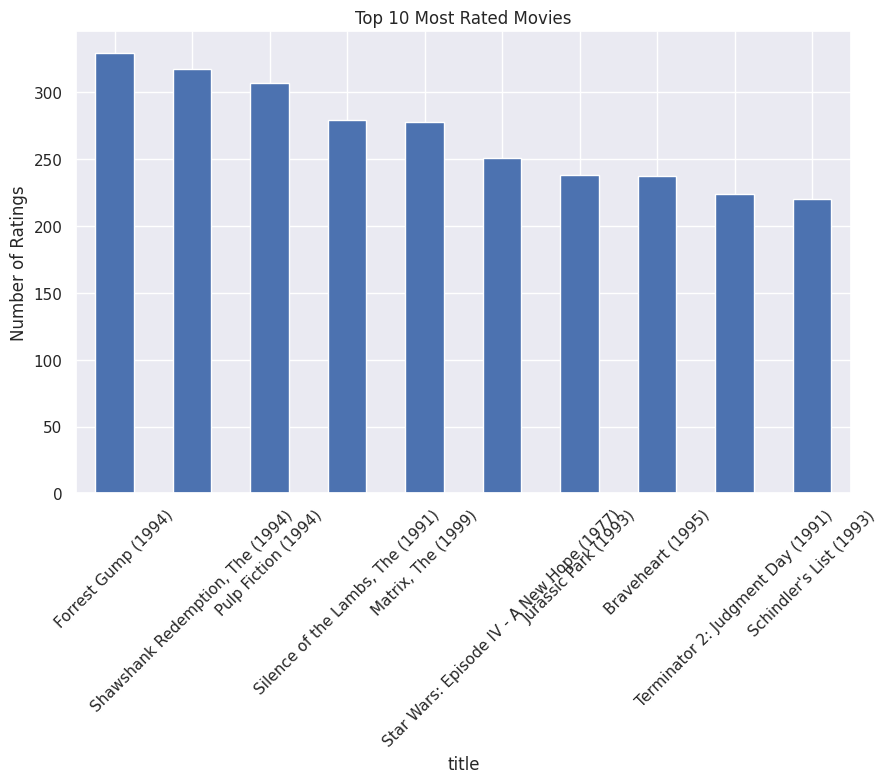

In [6]:
top_10 = rating_count.head(10)

plt.figure(figsize=(10,6))
top_10.plot(kind='bar')
plt.title('Top 10 Most Rated Movies')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

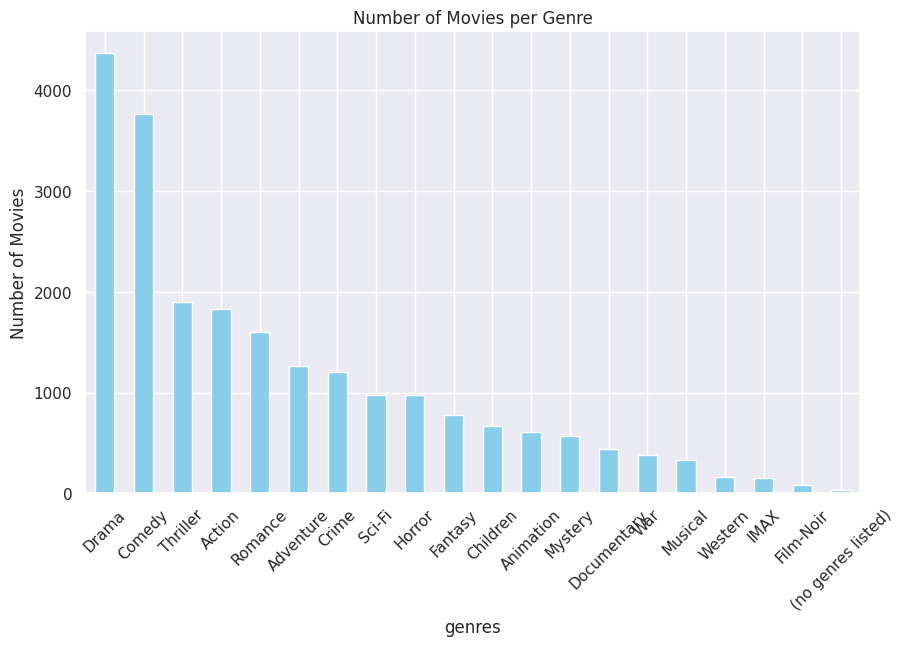

In [7]:
genres = movies['genres'].str.split('|').explode()
genre_counts = genres.value_counts()

plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [8]:
movie_stats = df.groupby('title').agg({
    'rating': ['mean', 'count']
})

# Rename columns
movie_stats.columns = ['Average Rating', 'Rating Count']
movie_stats = movie_stats.sort_values('Average Rating', ascending=False)

# Show first few
movie_stats.head()

,Average Rating,Rating Count
title,,
Karlson Returns (1970),5.0,1
Zeitgeist: Moving Forward (2011),5.0,1
"Dream of Light (a.k.a. Quince Tree Sun, The) (Sol del membrillo, El) (1992)",5.0,1
Dragons: Gift of the Night Fury (2011),5.0,1
12 Angry Men (1997),5.0,1


In [9]:
popular_movies = movie_stats[movie_stats['Rating Count'] >= 50]
popular_movies_sorted = popular_movies.sort_values('Average Rating', ascending=False)

# Show top 10
print("Top 10 Popular Movies (based on rating):")
popular_movies_sorted.head(10)

Top 10 Popular Movies (based on rating):


,Average Rating,Rating Count
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
Cool Hand Luke (1967),4.271930,57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97
Rear Window (1954),4.261905,84
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126


<ipython-input-10-6f395cd405fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10['Average Rating'], y=top10.index, palette="viridis")


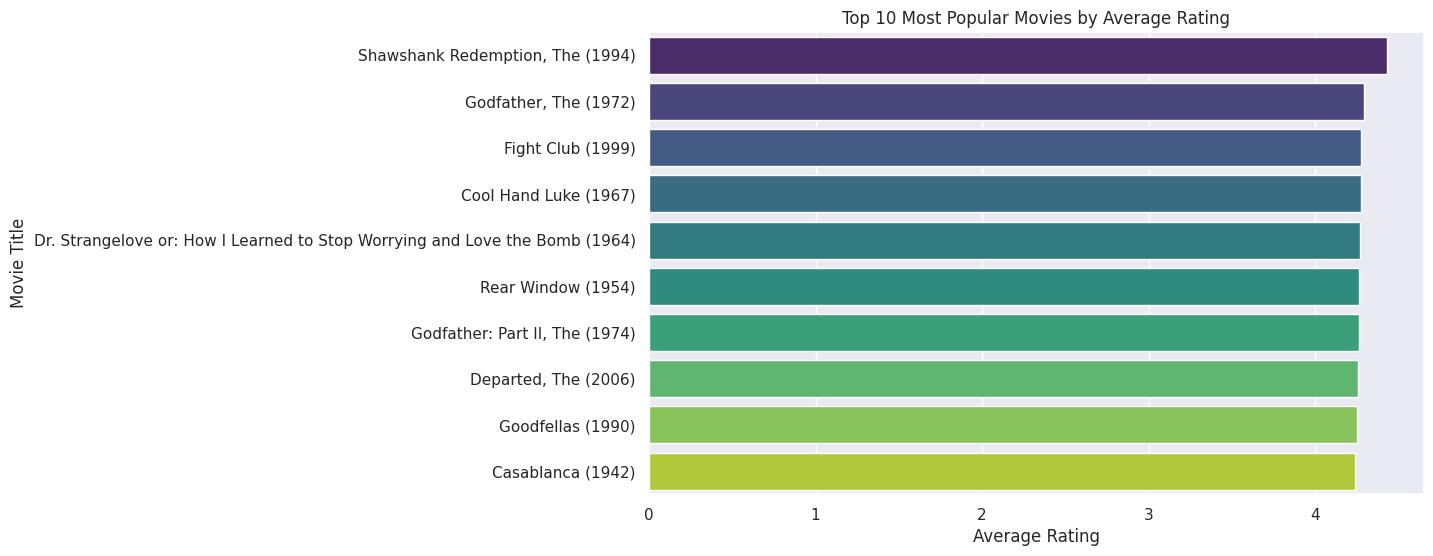

In [10]:
top10 = popular_movies_sorted.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10['Average Rating'], y=top10.index, palette="viridis")
plt.title('Top 10 Most Popular Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
genre_df = movies.copy()

genre_df['genres'] = genre_df['genres'].fillna('')

count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split('|'))
genre_matrix = count_vectorizer.fit_transform(genre_df['genres'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
genre_matrix.toarray()[:5]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
# Fill missing genres just in case
movies['genres'] = movies['genres'].fillna('')

all_genres = movies['genres'].str.split('|').explode().unique()

unique_genres = sorted([genre for genre in all_genres if genre != '(no genres listed)'])

print(" Unique Genres in Dataset:")
for genre in unique_genres:
    print("-", genre)

 Unique Genres in Dataset:
- Action
- Adventure
- Animation
- Children
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- IMAX
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western


In [17]:
cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

In [18]:
indices = pd.Series(genre_df.index, index=genre_df['title']).drop_duplicates()

def get_similar_movies(title, n=10):
    idx = indices.get(title)

    if idx is None:
        print("Movie not found.")
        return

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]

    movie_indices = [i[0] for i in sim_scores]
    return genre_df['title'].iloc[movie_indices]

In [38]:
get_similar_movies("Seven (a.k.a. Se7en) (1995)")

,title
221,Just Cause (1995)
293,Underneath (1995)
569,True Crime (1996)
686,Rear Window (1954)
1119,Absolute Power (1997)
1651,Saboteur (1942)
1686,Mortal Thoughts (1991)
2421,Pacific Heights (1990)
2576,Eyes of Laura Mars (1978)
2659,Jennifer 8 (1992)


In [44]:
get_similar_movies("NeverEnding Story, The (1984)")

,title
53,"Indian in the Cupboard, The (1995)"
109,"NeverEnding Story III, The (1994)"
767,Escape to Witch Mountain (1975)
1514,Darby O'Gill and the Little People (1959)
1556,Return to Oz (1985)
1617,"NeverEnding Story, The (1984)"
1618,"NeverEnding Story II: The Next Chapter, The (1..."
1799,Santa Claus: The Movie (1985)
3574,Harry Potter and the Sorcerer's Stone (a.k.a. ...
6075,"Chronicles of Narnia: The Lion, the Witch and ..."
